In [1]:
import numpy as np
import pandas as pd
import sys 

import OONMF
from OONMFhelpers import *
today  = get_today()

In [2]:
today

'2018-11-09'

In [3]:
Basis_orig = np.load('2018-06-08NC16_NNDSVD_Basis.npy')

In [4]:
Basis_new = np.load('2018-11-09PancSpecialNC16seed20.npy')

In [5]:
Basis_new[0]

array([0.53811862, 0.06409762, 0.        , 0.        , 3.77205876,
       0.        , 0.        , 0.        , 0.        , 0.10269353,
       0.        , 0.        , 0.0267936 , 0.        , 0.        ,
       0.        ])

In [6]:
Basis_orig[0]

array([0.53816178, 0.06410584, 0.        , 0.        , 3.77199334,
       0.        , 0.        , 0.        , 0.        , 0.10268507,
       0.        , 0.        , 0.02677383, 0.        , 0.        ,
       0.        ])

In [7]:
Basis_new.shape

(756, 16)

In [8]:
Basis_orig.shape

(733, 16)

In [62]:
np.concatenate([Basis_new[3:6], Basis_new[6:7]]) .shape

(4, 16)

In [9]:
Basis_panky = Basis_new[733:]

In [10]:
Basis_panky.shape

(23, 16)

In [11]:
Comp_colors = ['#FFE500', '#FE8102', '#FF0000', '#07AF00', '#4C7D14', '#414613', '#05C1D9', '#0467FD', '#009588', '#BB2DD4', '#7A00FF', '#4A6876', '#08245B', '#B9461D', '#692108', '#C3C3C3']
neworder = np.array([16,10,7,11,2,12,1,8,4,15,14,5,9,6,3,13]).astype(int) - 1
Comp_colors = np.array(Comp_colors)[neworder]

In [12]:
def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[],  plot_title=''):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        #print('inventing barsortorder')
    if len(names) < 1:
        #print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder],  color=Comp_colors[0], bottom=ground_pSample[start:end], alpha=1.0)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=1.0)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    if (len(plot_title) > 0):
        plt.title(plot_title,fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.3])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    #plt.savefig(bargraph_out)
    plt.show()

In [13]:
sampnamePD = pd.read_table('sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type
fullnames = sampnamePD.full_name.values

In [14]:
fullnames

array(['LN1203-DS7748-GM06990', 'LN1207-DS7764-HepG2',
       'LN1222-DS7840-hTH1', 'LN1264-DS8200-Hela', 'LN1269-DS8235-CACO2',
       'LN1289-DS8416-CACO2', 'LN1310-DS8476-SKNSH',
       'LN1312-DS8482-SKNSH', 'LN1376-DS8680-HMEC',
       'LN1614-DS9432-GM12878', 'LN1615-DS9445-MCF7',
       'LN1684-DS9764-K562', 'LN1691-DS9767-K562', 'LN1753-DS9873-PANC1',
       'LN1782-DS9955-PANC1', 'LN1789-DS10011-HeLaS3',
       'LN1791-DS10018-BJ', 'LN1812-DS10060-HUVEC', 'LN1816-DS10081-BJ',
       'LN1835-DS10167-HESC', 'LN1924-DS10514-SAEC',
       'LN1926-DS10518-SAEC', 'LN1951-DS10631-HRE', 'LN1953-DS10641-HRE',
       'LN1958-DS10662-HRCE', 'LN1959-DS10666-HRCE',
       'LN1960-DS10671-GM12878', 'LN1963-DS10681-Jurkat',
       'LN2044-DS11039-hTH17', 'LN2098-DS11202-CD34',
       'LN2188-DS11474-NHEK', 'LN2190-DS11476-NHEK',
       'LN2272-DS11637-HConF', 'LN2275-DS11642-HConF',
       'LN2281-DS11666-CD34', 'LN2302-DS11733-HL60', 'LN2304-DS11738-HGF',
       'LN2307-DS11752-HGF', 'LN230

In [15]:
pancnames_cut = []
for name in fullnames:
    if 'PANC' in name:
        pancnames_cut.append(True)
    elif 'Pancreas' in name:
        pancnames_cut.append(True)
    else:
        pancnames_cut.append(False)


In [16]:
pancnames_cut = np.array(pancnames_cut)
len(pancnames_cut[pancnames_cut])

3

In [17]:
finname = 'lala.txt'
f = open(finname, 'r')
dars = f.readlines()
pank_LN_ar = []
for line in dars:
    pank_LN_ar.append(line.strip())
f.close()

In [18]:
pank_LN_ar

['LN51452',
 'LN51451',
 'LN51450',
 'LN51203',
 'LN51197',
 'LN51199',
 'LN51171',
 'LN51164',
 'LN51172',
 'LN51179',
 'LN51183',
 'LN51176',
 'LN51168',
 'LN51330',
 'LN51331',
 'LN51536',
 'LN51532',
 'LN51329',
 'LN51327',
 'LN51328',
 'LN51326',
 'LN51291',
 'LN51294']

In [19]:
allnames = fullnames.tolist() + pank_LN_ar

In [20]:
len(allnames)

756

<Figure size 432x288 with 0 Axes>

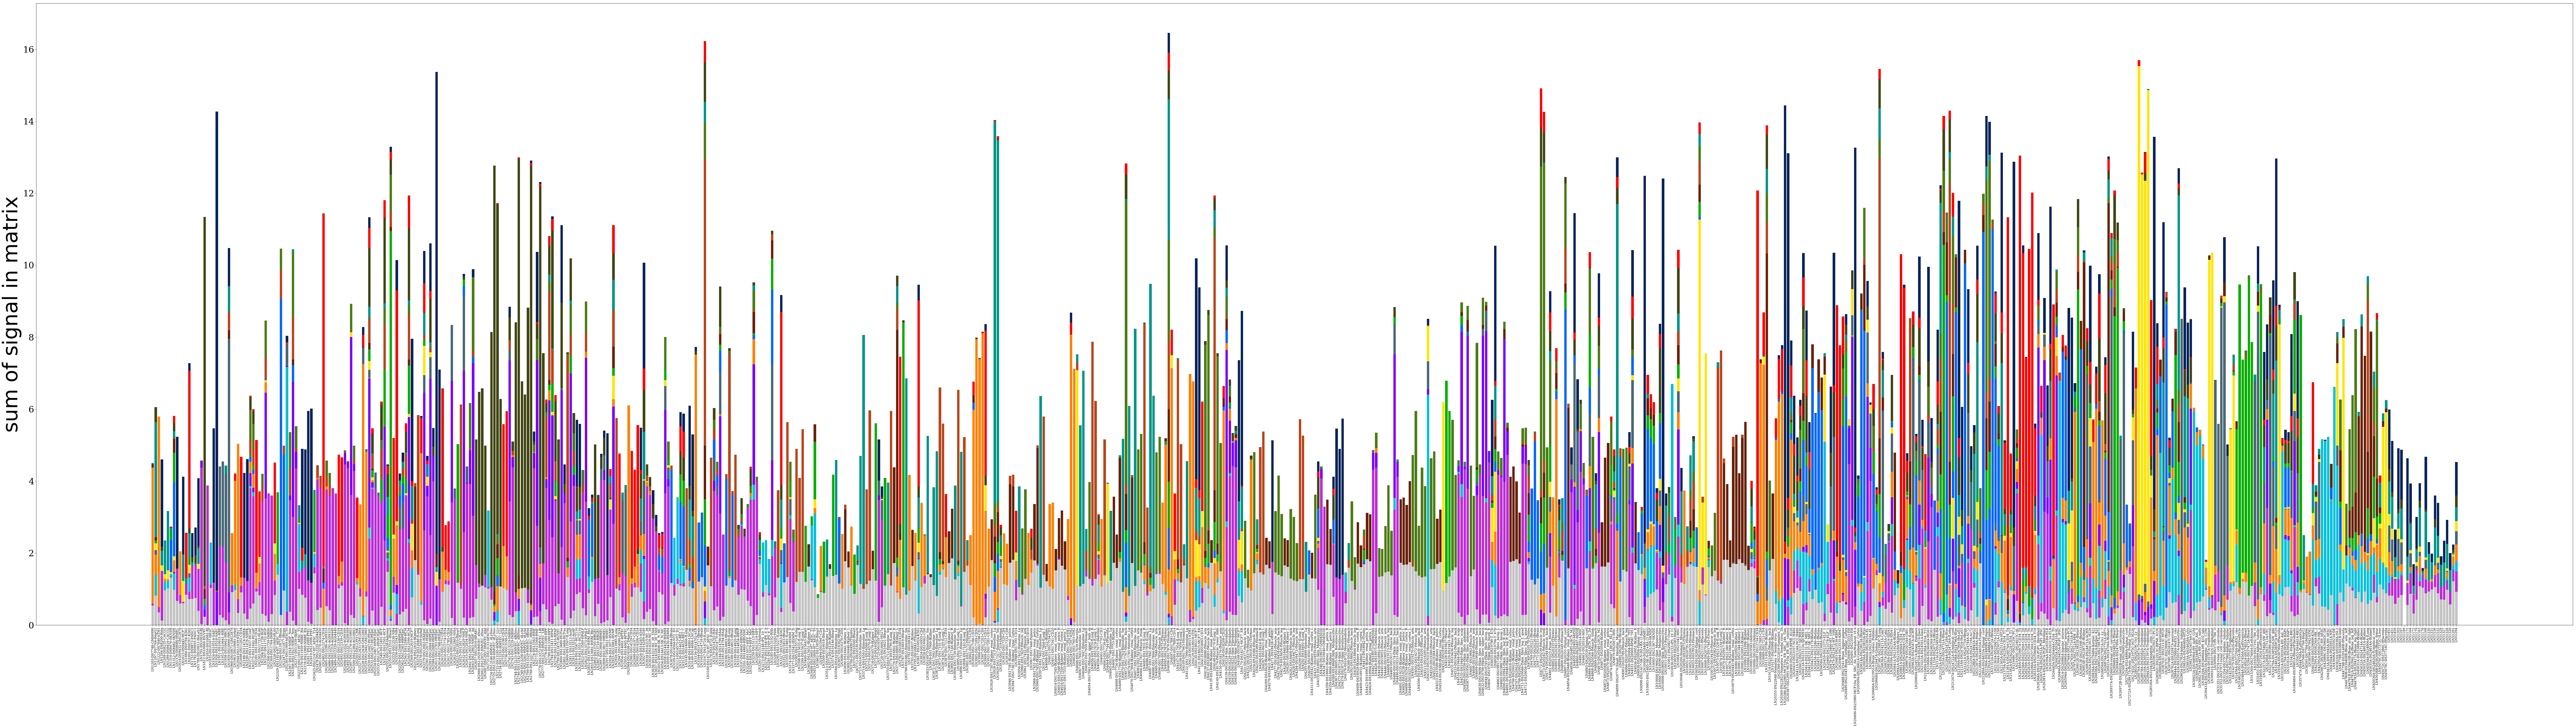

In [21]:
make_stacked_bar_plot(16, 756, Basis_new.T, '', names=np.array(allnames))

In [95]:
old_new_panc = np.concatenate([Basis_orig[pancnames_cut],Basis_panky ])
old_new_panc_names = np.array(fullnames[pancnames_cut]).tolist() + pank_LN_ar

In [99]:
np.sum(Basis_panky, axis=1)

array([5.98863141e+00, 5.11945259e+00, 2.65100149e+00, 4.91141455e+00,
       4.86947627e+00, 1.24492240e-03, 4.63819650e+00, 3.93841647e+00,
       1.69329313e+00, 3.00504599e+00, 3.94285884e+00, 1.58717165e+00,
       4.67813644e+00, 2.30471462e+00, 1.98748162e+00, 3.59849911e+00,
       3.39320310e+00, 1.91343940e+00, 2.34439684e+00, 2.92276764e+00,
       2.00037494e+00, 2.24078226e+00, 4.52613134e+00])

In [100]:
Basis_panky[5]

array([1.03251685e-03, 1.85073880e-04, 0.00000000e+00, 0.00000000e+00,
       2.73316731e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

<Figure size 432x288 with 0 Axes>

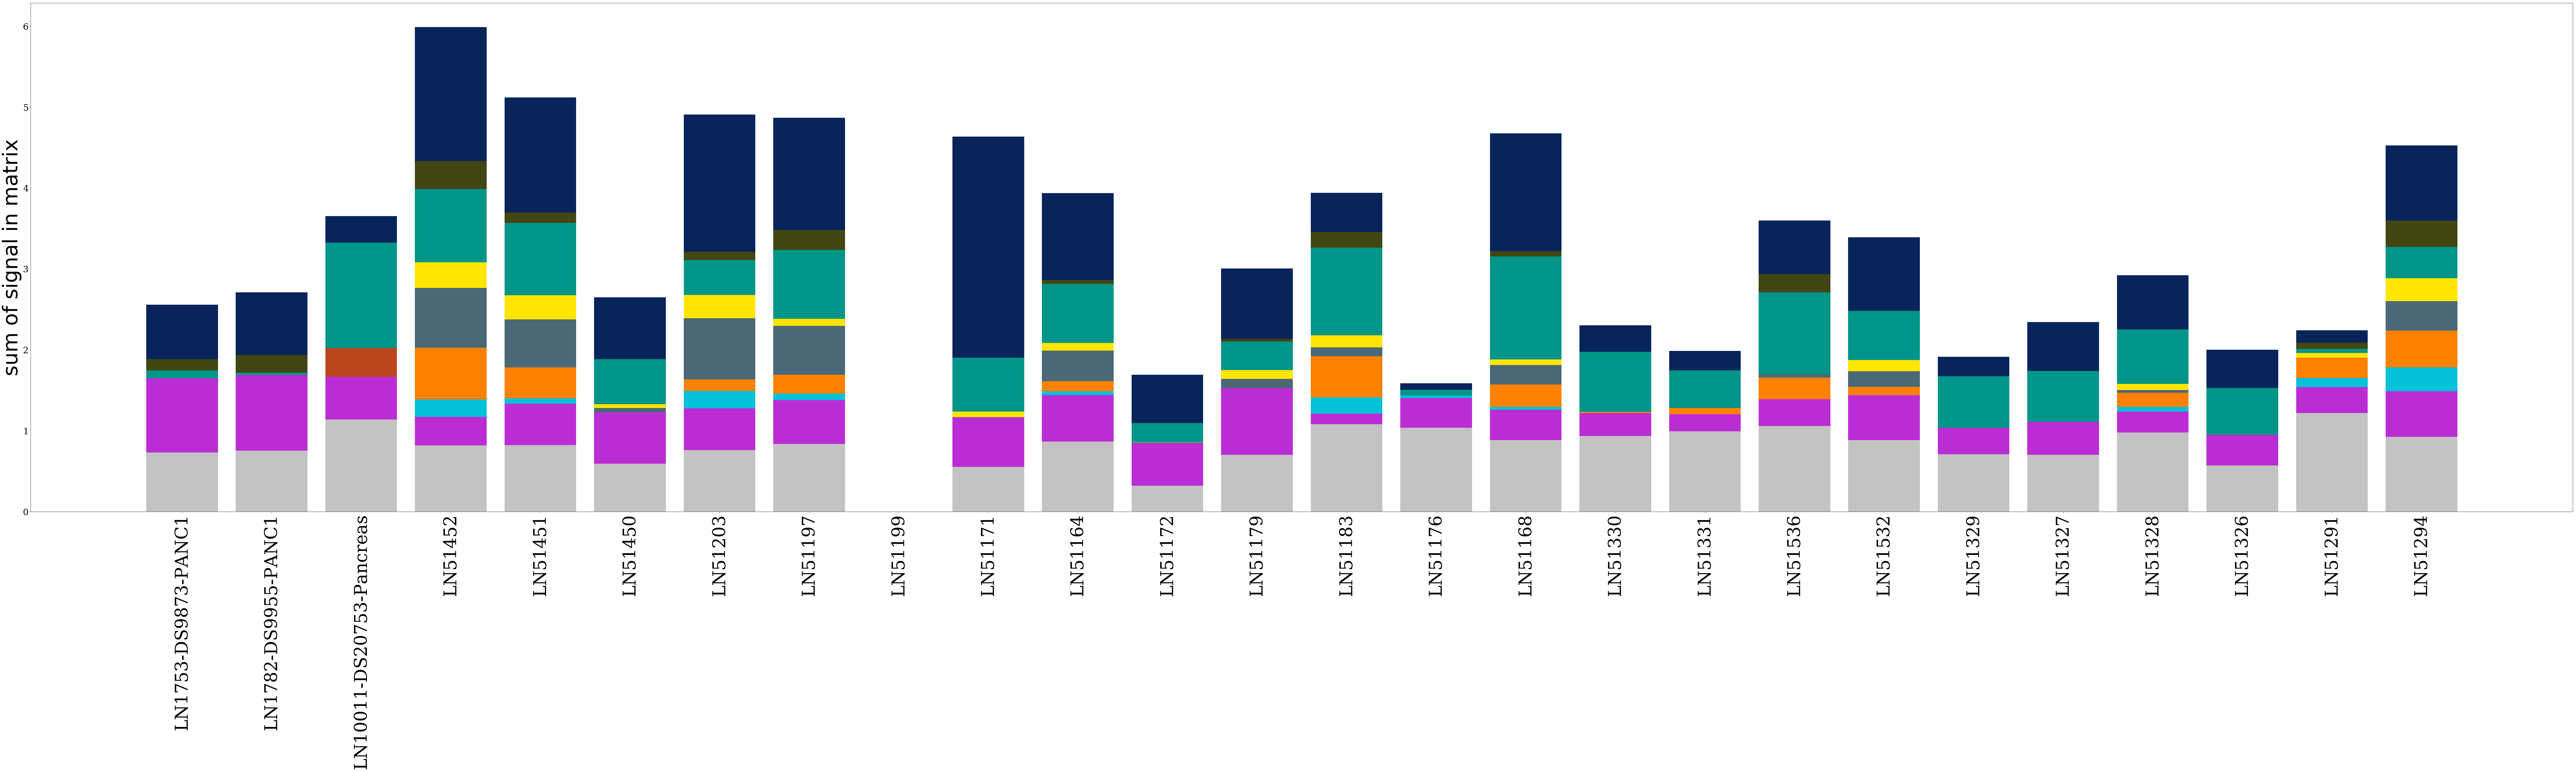

In [96]:
make_stacked_bar_plot(16, 26, old_new_panc.T, '', names=np.array(old_new_panc_names))

In [24]:
import umap

/Users/amuratov/anaconda/lib/python3.5/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [25]:
umap

<module 'umap' from '/Users/amuratov/anaconda/lib/python3.5/site-packages/umap/__init__.py'>

In [83]:
reducer = umap.UMAP(min_dist=0.5, n_neighbors=50, random_state=33)


In [85]:
embedding = reducer.fit_transform(Basis_orig)

In [86]:
majcomp = np.argmax(Basis_orig, axis=1)

<Figure size 432x288 with 0 Axes>

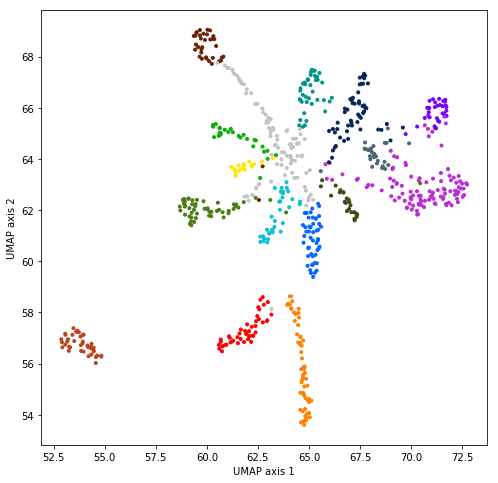

In [94]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

In [88]:
newdata = reducer.transform(Basis_panky)

In [89]:
newdata

array([[65.484856, 64.59459 ],
       [65.29907 , 64.68337 ],
       [65.22125 , 64.0825  ],
       [65.92046 , 64.415115],
       [65.28739 , 64.52648 ],
       [64.12524 , 63.2238  ],
       [66.46501 , 65.24736 ],
       [65.24149 , 64.199265],
       [65.072655, 63.797123],
       [65.515015, 63.82479 ],
       [64.66114 , 64.38893 ],
       [63.41062 , 64.6768  ],
       [65.30368 , 64.64023 ],
       [64.55129 , 64.37758 ],
       [64.10595 , 64.771996],
       [65.07651 , 64.38265 ],
       [65.15111 , 64.362595],
       [64.77293 , 64.25899 ],
       [64.98791 , 64.35609 ],
       [64.9949  , 64.21734 ],
       [65.00096 , 64.48454 ],
       [63.437057, 64.219536],
       [65.29926 , 64.04781 ]], dtype=float32)

In [90]:
majcomp_new = np.argmax(Basis_panky, axis=1)

<Figure size 432x288 with 0 Axes>

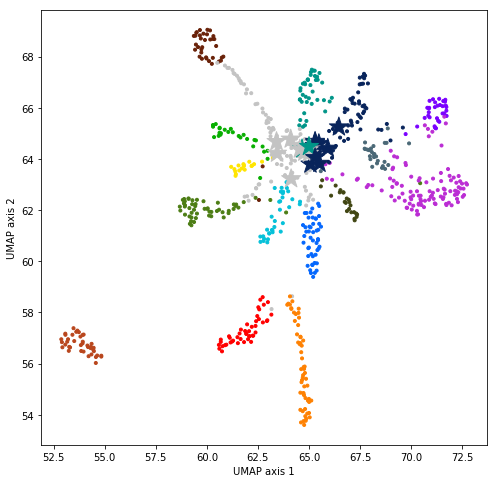

In [101]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=400)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

<Figure size 432x288 with 0 Axes>

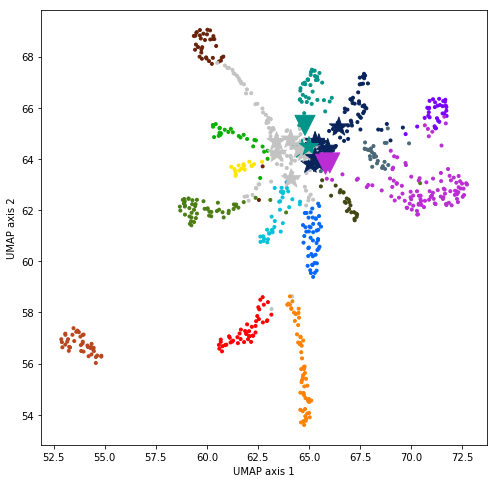

In [106]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=400)
plt.scatter(embedding[:,0][pancnames_cut], embedding[:,1][pancnames_cut], color=Comp_colors[majcomp[pancnames_cut]], alpha=1, marker='v', s=400)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()

<Figure size 432x288 with 0 Axes>

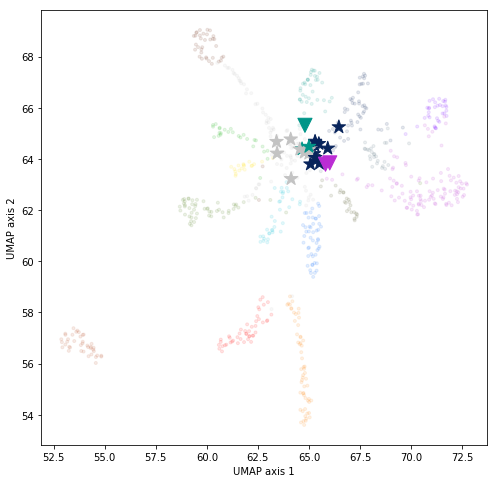

In [108]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=0.1, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=200)
plt.scatter(embedding[:,0][pancnames_cut], embedding[:,1][pancnames_cut], color=Comp_colors[majcomp[pancnames_cut]], alpha=1, marker='v', s=200)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()